In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 그래프 한글 안깨지게
plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 안깨지게
plt.rc("axes",unicode_minus=False)

In [58]:
df = pd.read_csv("Downloads/NHIS_OPEN_GJ_2018.csv", encoding="utf-8")

In [15]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [17]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
282642,2018,282643,2,9,28,170,65,76.0,1.5,1.2,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [19]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

In [24]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                414
시력(좌)               253
시력(우)               266
청력(좌)               217
청력(우)               217
수축기혈압              5730
이완기혈압              5730
식전혈당(공복혈당)         5915
총콜레스테롤           667244
트리글리세라이드         667252
HDL콜레스테롤         667254
LDL콜레스테롤         674122
혈색소                5914
요단백               10570
혈청크레아티닌            5906
(혈청지오티)AST         5906
(혈청지오티)ALT         5906
감마지티피              5909
흡연상태                234
음주여부             354943
구강검진수검여부              0
치아우식증유무          600008
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               600007
데이터공개일자               0
dtype: int64

In [32]:
df.columns
# column 요약하기
df[["(혈청지오티)AST", "(혈청지오티)ALT"]].describe()

,(혈청지오티)AST,(혈청지오티)ALT
count,994094.000000,994094.000000
mean,26.301625,26.287882
std,26.367652,27.275675
min,1.000000,1.000000
25%,19.000000,15.000000
50%,23.000000,20.000000
75%,29.000000,30.000000
max,9999.000000,5896.000000


# groupby & pivot_table

In [38]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    535600
2    464400
Name: 가입자일련번호, dtype: int64

In [59]:
df["음주여부"]= df["음주여부"].fillna(0)

In [60]:
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     119103
      1.0     416497
2     0.0     235851
      1.0     228549
Name: 가입자일련번호, dtype: int64

In [61]:
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   117862  35.411558    26.0
     1.0   415735  53.739738    35.0
2    0.0   232439  23.265984    17.0
     1.0   228055  23.949196    17.0

In [65]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,354954
1.0,645046


In [67]:
df.pivot_table(index="음주여부",values="감마지티피",aggfunc=["mean","median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,27.352474,20.0
1.0,43.186791,27.0


In [70]:
df.pivot_table(index=["음주여부","성별코드"],values="감마지티피",aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  26.0  39.0  117862.0  999.0  35.411558  3.0  39.716187
     2     13.0  17.0  25.0  232439.0  999.0  23.265984  1.0  25.118714
1.0  1     23.0  35.0  60.0  415735.0  999.0  53.739738  1.0  65.508947
     2     13.0  17.0  24.0  228055.0  999.0  23.949196  1.0  31.766087

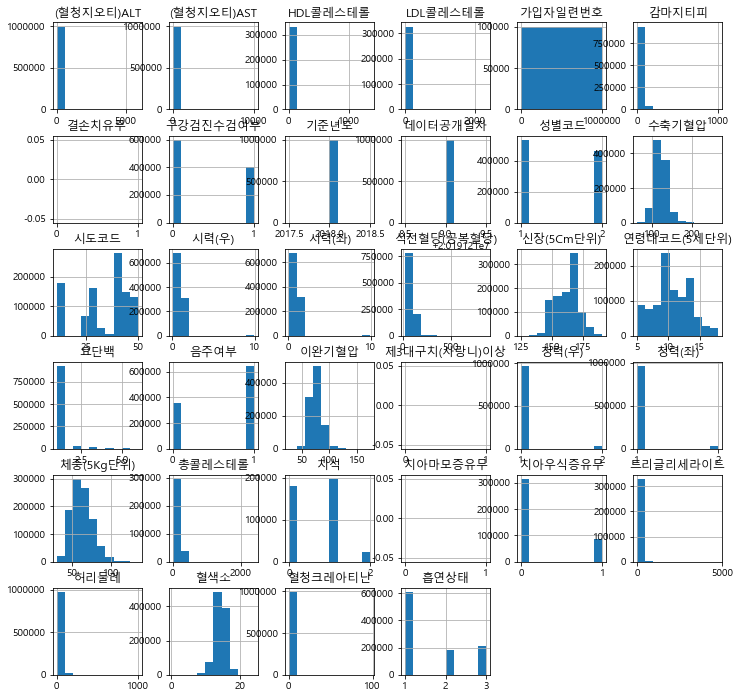

In [71]:
h= df.hist(figsize=(12,12))

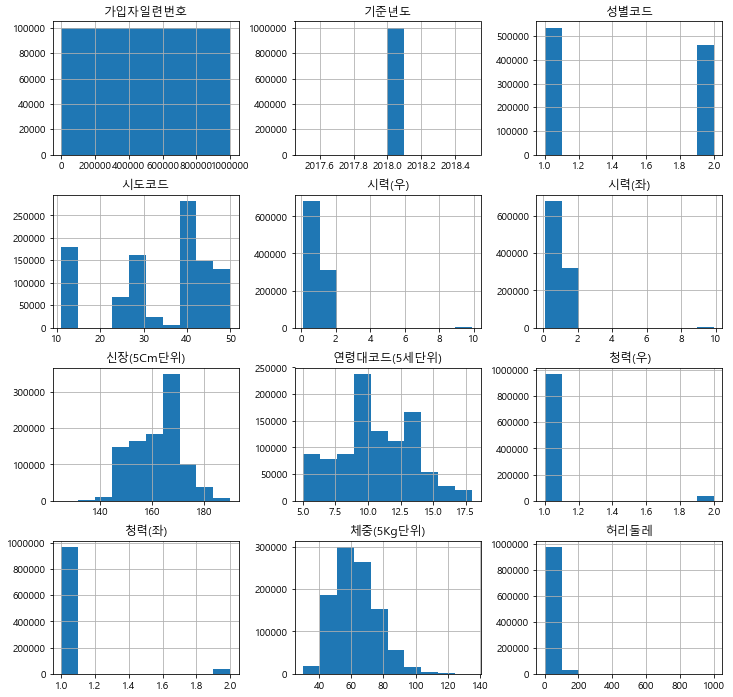

In [74]:
# iloc[행,열]--> : , : =전체범위
h= df.iloc[:,:12].hist(figsize=(12,12))

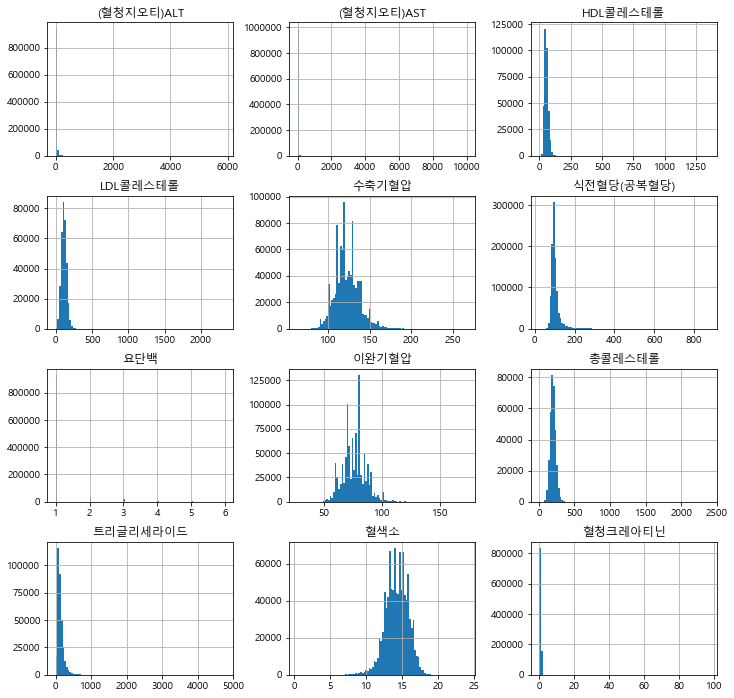

In [77]:
# bins --> 막대를 잘게(자세한 분포 파악가능)
h =df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

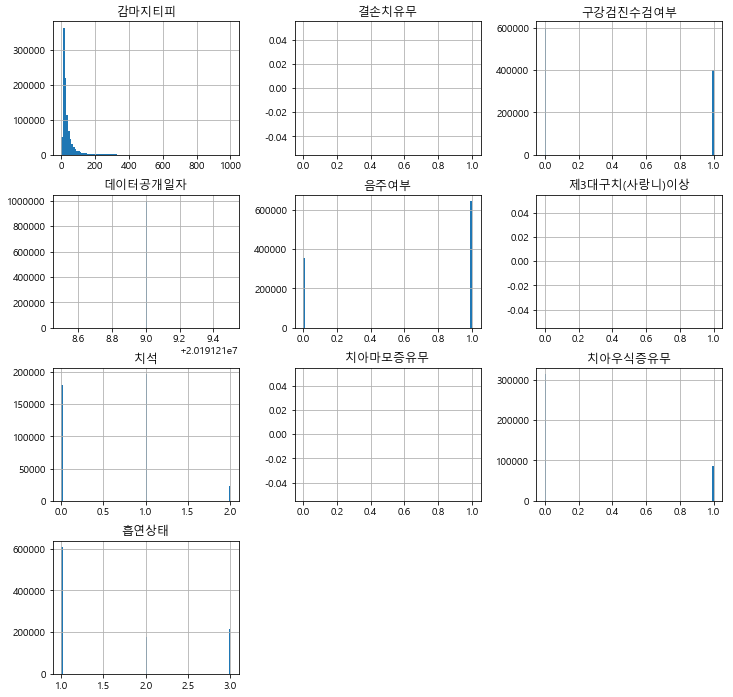

In [78]:
h =df.iloc[:,24:].hist(figsize=(12,12),bins=100)

In [82]:
df_sample= df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

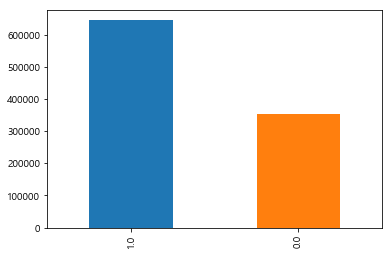

In [85]:
df["음주여부"].value_counts().plot.bar()

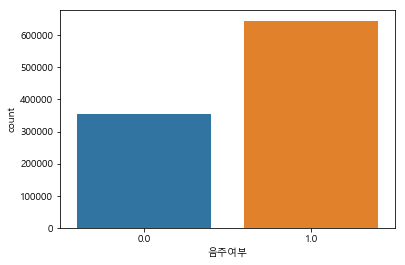

In [86]:
sns.countplot(data=df,x="음주여부")

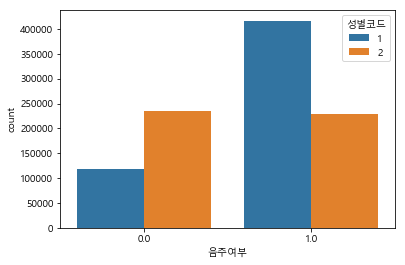

In [87]:
# sns.set(font_scale=1,5, font=MalgunGothic)
sns.countplot(data=df,x="음주여부",hue="성별코드")

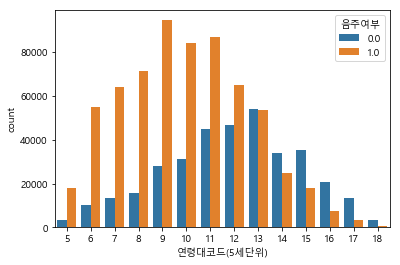

In [90]:
sns.countplot(data=df, x="연령대코드(5세단위)",hue="음주여부")

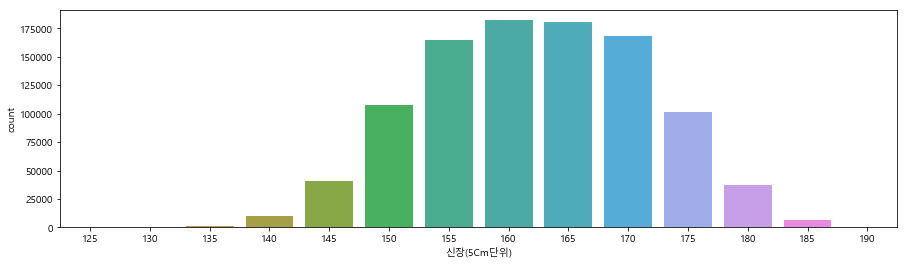

In [94]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

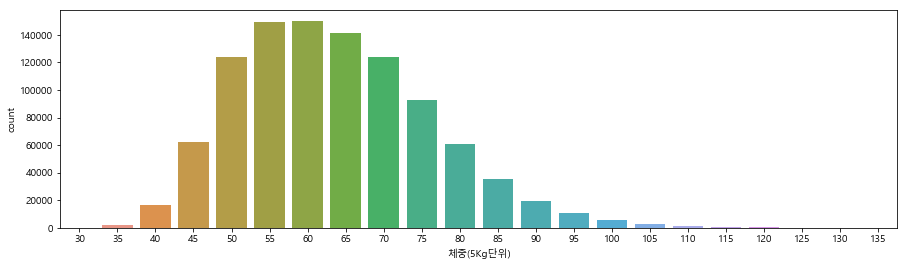

In [95]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)")

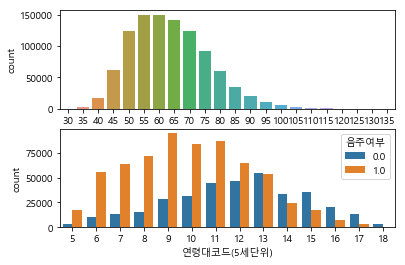

<Figure size 1080x288 with 0 Axes>

In [109]:
fig,(ax1,ax2)=plt.subplots(2,1)
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg단위)",ax=ax1)
sns.countplot(data=df, x="연령대코드(5세단위)",hue="음주여부",ax=ax2)

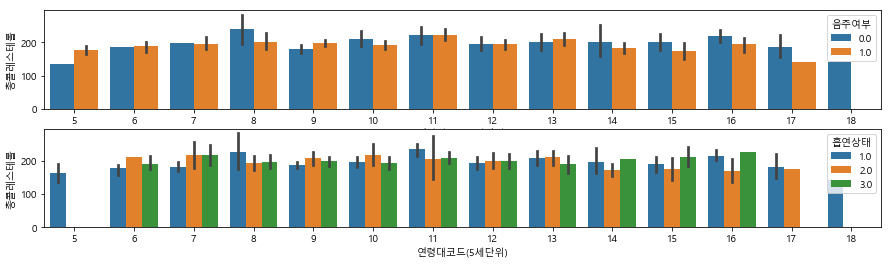

In [116]:
# 데이터가 너무 많아서 실행속도 오래 걸릴 경우 data sampling 
fig,((ax1),(ax2))=plt.subplots(2,1)
fig.set_size_inches(15,4)
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="총콜레스테롤",hue="음주여부",ax=ax1)
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="총콜레스테롤",hue="흡연상태",ax=ax2)

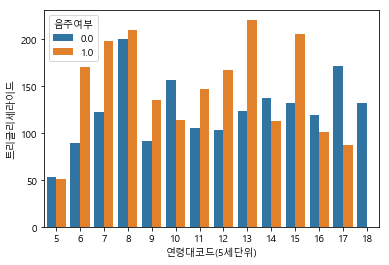

In [120]:
# ci=신뢰구간
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="트리글리세라이드",hue="음주여부",ci=None)

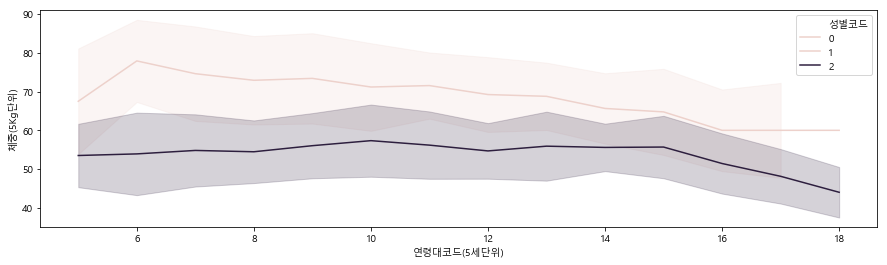

In [122]:
# lineplot에선 그림자가 곧 신뢰수준
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)", hue="성별코드", ci="sd")

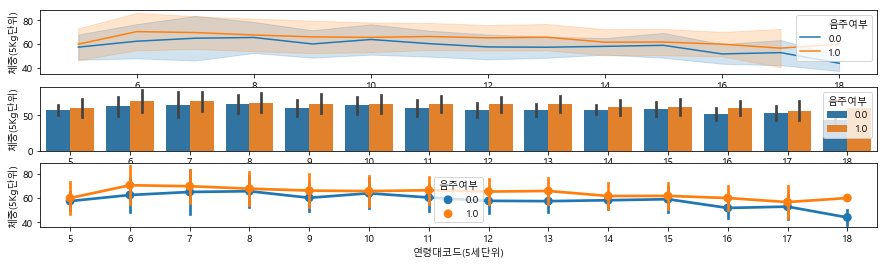

In [126]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
fig.set_size_inches(15,4)
sns.lineplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)", hue="음주여부", ci="sd",ax=ax1)
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)", hue="음주여부", ci="sd",ax=ax2)
sns.pointplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)", hue="음주여부", ci="sd",ax=ax3)

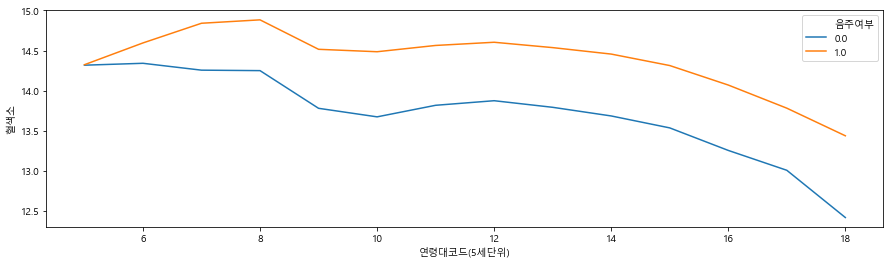

In [129]:
# lineplot과 pointplot --> 재고량, 판매량, 주식 등 수치의 변화
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소",hue="음주여부",ci=None)

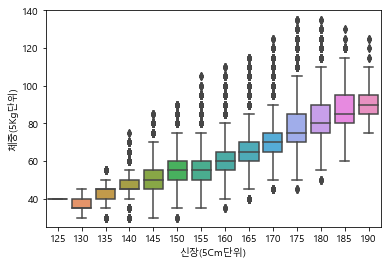

In [130]:
# box 밑선 = 1사분위 / 중간선 = 50% / box 윗선 = 3사분위
# 납작한 구간은 data가 없는 구간
# 점찍힌 구간은 이상치(outliar)
sns.boxplot(data=df, x="신장(5Cm단위)",y="체중(5Kg단위)")

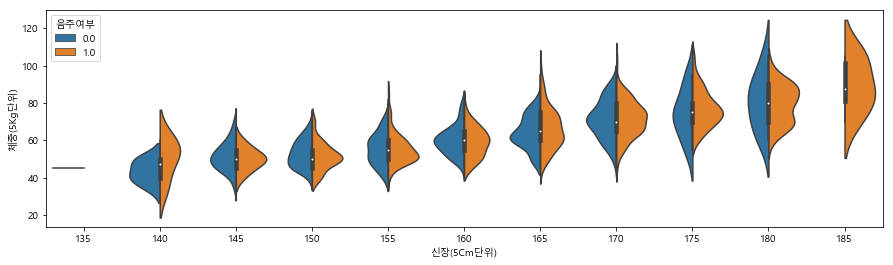

In [134]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",split=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


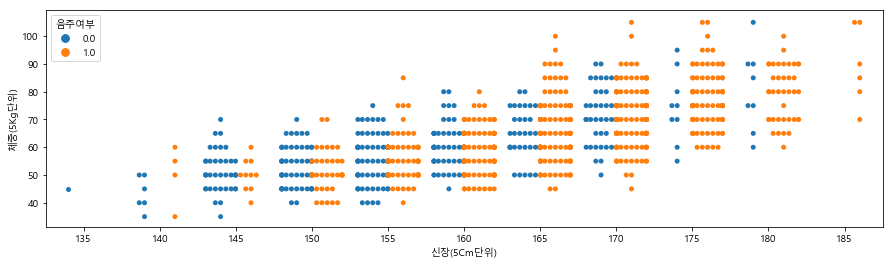

In [135]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",split=True)

<Figure size 1080x288 with 0 Axes>

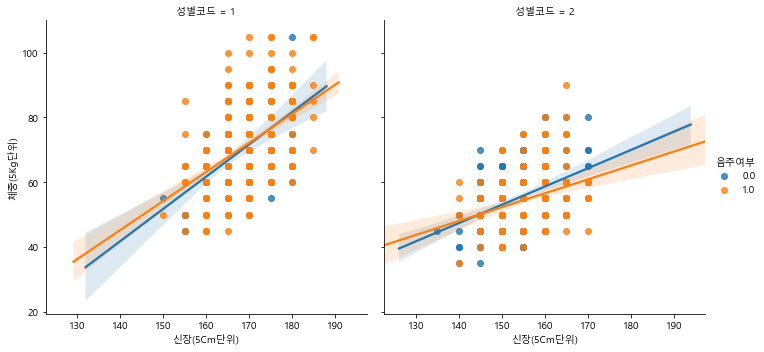

In [138]:
plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",col="성별코드")

<Figure size 1080x288 with 0 Axes>

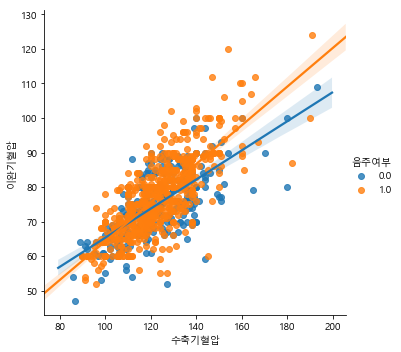

In [141]:

plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample, x="수축기혈압",y="이완기혈압",hue="음주여부")

<Figure size 1080x288 with 0 Axes>

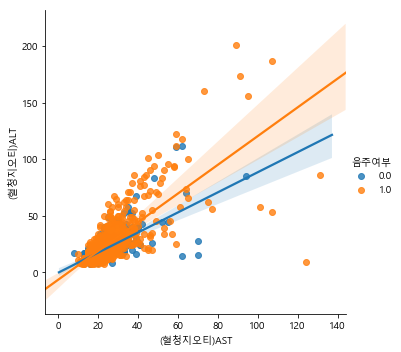

In [145]:
# robust = 이상치 영향을 적게
plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",robust=True)

In [153]:
df_ASLT=df_sample[(df_sample["(혈청지오티)AST"]<100)&(df_sample["(혈청지오티)ALT"]<100)]

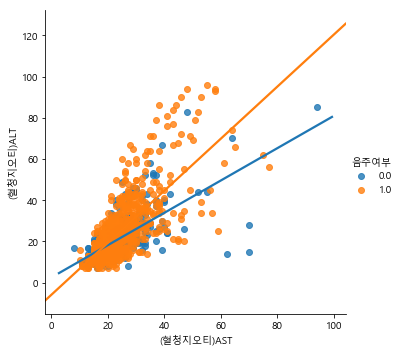

In [154]:
sns.lmplot(data=df_ASLT,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",ci=None)

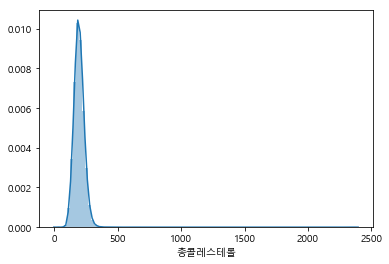

In [160]:
# distplot은 막대함수와 함께 확률밀도도 같이 
sns.distplot(df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"],bins=100)

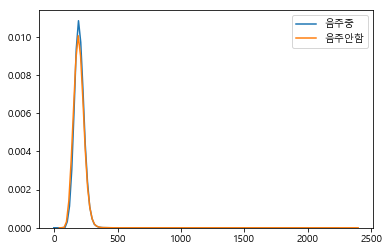

In [164]:
# kdeplot은 막대기 빼고 
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==1),"총콜레스테롤"],label="음주중")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==0),"총콜레스테롤"],label="음주안함")

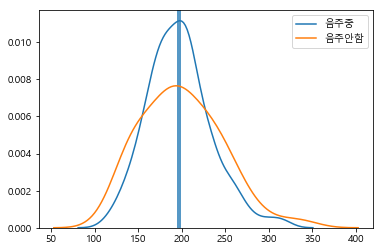

In [167]:
plt.axvline(df_sample["총콜레스테롤"].mean())
plt.axvline(df_sample["총콜레스테롤"].median())
sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==1),"총콜레스테롤"],label="음주중")
sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==0),"총콜레스테롤"],label="음주안함")

In [169]:
columns=df.columns

In [174]:
df_small=df_sample[columns]
df_corr=df_small.corr()
# 기본method는 피어슨 상관계수
df_corr


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자일련번호,NaN,1.000000,-0.009127,-0.016505,-0.002410,0.043223,0.048177,0.022147,0.044777,0.027282,...,0.030064,0.040388,0.024961,0.028226,0.078646,NaN,NaN,NaN,0.075540,NaN
성별코드,NaN,-0.009127,1.000000,0.163058,0.027290,-0.735356,-0.623354,-0.472141,-0.111266,-0.181617,...,-0.341427,-0.572610,-0.373870,-0.060849,-0.047496,NaN,NaN,NaN,0.004431,NaN
연령대코드(5세단위),NaN,-0.016505,0.163058,1.000000,0.025392,-0.452231,-0.261563,0.132583,-0.140596,-0.137492,...,-0.017735,-0.120224,-0.355969,-0.153253,-0.092411,NaN,NaN,NaN,-0.034648,NaN
시도코드,NaN,-0.002410,0.027290,0.025392,1.000000,-0.070697,-0.057001,-0.039126,0.006253,-0.088470,...,0.008822,0.003987,-0.012882,-0.023418,-0.001125,NaN,NaN,NaN,0.022941,NaN
신장(5Cm단위),NaN,0.043223,-0.735356,-0.452231,-0.070697,1.000000,0.700127,0.356751,0.151791,0.207050,...,0.226586,0.434053,0.387120,0.071787,-0.003005,NaN,NaN,NaN,-0.047260,NaN
체중(5Kg단위),NaN,0.048177,-0.623354,-0.261563,-0.057001,0.700127,1.000000,0.788413,0.107435,0.118712,...,0.395472,0.346634,0.268202,0.023558,0.036613,NaN,NaN,NaN,0.013962,NaN
허리둘레,NaN,0.022147,-0.472141,0.132583,-0.039126,0.356751,0.788413,1.000000,0.013872,0.031881,...,0.408714,0.263723,0.078336,-0.032005,0.033479,NaN,NaN,NaN,0.049653,NaN
시력(좌),NaN,0.044777,-0.111266,-0.140596,0.006253,0.151791,0.107435,0.013872,1.000000,0.162669,...,0.015872,0.073406,0.103488,0.007609,0.077677,NaN,NaN,NaN,-0.022943,NaN
시력(우),NaN,0.027282,-0.181617,-0.137492,-0.088470,0.207050,0.118712,0.031881,0.162669,1.000000,...,0.021997,0.066016,0.144947,0.003482,-0.017956,NaN,NaN,NaN,-0.005772,NaN


In [177]:
df_corr["신장(5Cm단위)"].sort_values()
df_corr.loc[df_corr["신장(5Cm단위)"]>0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg단위)     0.700127
허리둘레          0.356751
시력(좌)         0.151791
시력(우)         0.207050
이완기혈압         0.143624
트리글리세라이드      0.141666
혈색소           0.519500
혈청크레아티닌       0.293179
(혈청지오티)ALT    0.241718
감마지티피         0.226586
흡연상태          0.434053
음주여부          0.387120
Name: 신장(5Cm단위), dtype: float64

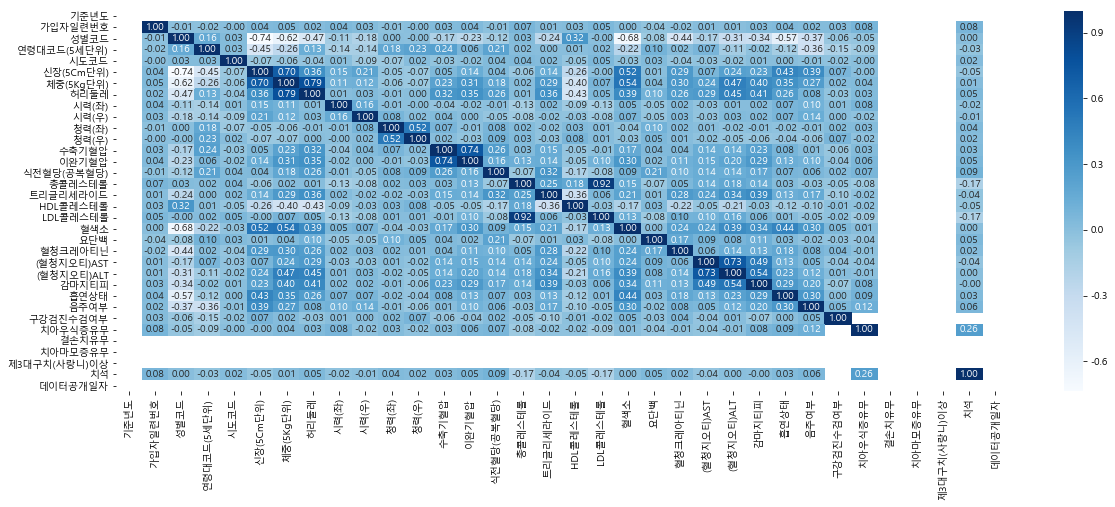

In [181]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True,fmt=".2f",cmap="Blues")